## 1. Getting started with NLTK

In [14]:
# Get started
import nltk
from nltk.book import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib as plt

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
text9

<Text: The Man Who Was Thursday by G . K . Chesterton 1908>

## Searching through text

1. You can use concordance for a given work
2. You can search for similar words
3. We can search common context for a list of words

### Concordance

See words that surround a given word.

In [4]:
text9.concordance('odd')

Displaying 6 of 6 matches:
nt empty . Then he realised ( in some odd way ) that the silence was rather a l
et smile . There was nothing whatever odd about him , except that he wore a pai
uare - shouldered man in tweeds , not odd save for the accident of his ugly spe
ut it might have struck a stranger as odd that there appeared in his train , no
nnocent world . " Have you noticed an odd thing ," he said , " about all your d
queerer still that I also have had my odd notion about the President , and I al


### Similar
What other words appear in the contenxt of 'odd'?

In [5]:
text9.similar('odd')

to of all certain strange curious indescribable anybody unaccountable


In [6]:
text9.common_contexts(['odd', 'strange'])

some_way


## This part is me doing something

Trying to run dispersion on top words.

In [7]:
# tokenize
text9_tokens = [t.lower() for t in text9 if t.isalpha()]

In [8]:
# get stop words and remove
stop_words = stopwords.words('english')

In [9]:
# Now filter these out
text9_tokens_wo_stops = [t for t in text9_tokens if t not in stop_words]

In [13]:
# Let's run lemmatizing the text
wordnet_lemmatizer = WordNetLemmatizer()
text9_lemma = [wordnet_lemmatizer.lemmatize(t) for t in text9_tokens_wo_stops]

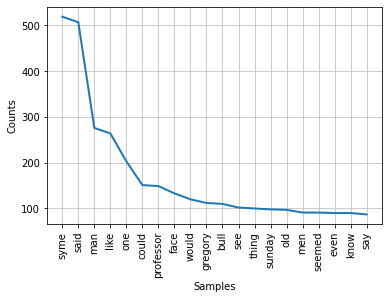

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# Lets look at the word frequencies
dist = FreqDist(text9_lemma)
dist.plot(20)

In [18]:
text9.similar('face')

head professor man smile president secretary world back hat voice
sword road enemy sky way him eyes train table forehead


In [19]:
text9.concordance('face')

Displaying 25 of 119 matches:
 long , auburn hair and the impudent face -- that young man was not really a p
 almost saintly oval , however , his face projected suddenly broad and brutal 
 of feathers that almost brushed the face . Across the great part of the dome 
 braids of red hair , but a kindlier face underneath them , laughed with such 
 at him from under level brows ; her face was grave and open , and there had f
 at the girl ' s red hair and amused face for what seemed to be a few minutes 
and long frock coat were black ; the face , in an abrupt shadow , was almost a
." " Very well ," said Gregory , his face darkening , " you shall see somethin
me with his large but indecipherable face . ' You want a safe disguise , do yo
mid a great rumble of applause . His face was deadly pale , so that by contras
Gregory had sat staring at him , his face idiotic with astonishment . Now in t
 you !" cried Gregory , with frantic face and hands . " Stop it , it is all --
od began to crawl back

/Users/kaiprenger/venv/python_class_2022/lib/python3.9/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


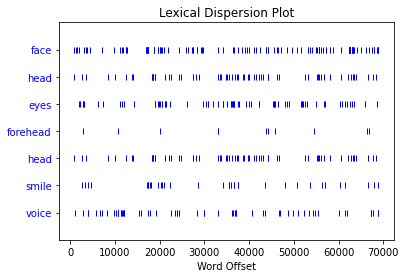

In [20]:
text9.dispersion_plot(['face', 'head', 'eyes', 'forehead', 'head', 'smile', 'voice'])

Just a random exploration to try to understand some common words, and how related words might present something. Let's get back to the NLTK book tutorial.

## Generate

This allows you to try and generate some text in the style of text in the corpus. Cool!

In [21]:
text9.generate()

Building ngram index...


is , and finding a Sunday teashop , turned in his loose straw hat on
the bench under the advice of his hands . , or an apple tree , but not
an anarchist . an hour his talk was a collision . " I ' d better ."
the foundation of solid meekness which lies at the anarchist breakfast
and had been too true . Syme and I did not lie only in a condition of
curious hilarity . for a nightmare to lead to a farcical ingenuity ,
and swung out of the affair , and a great


'is , and finding a Sunday teashop , turned in his loose straw hat on\nthe bench under the advice of his hands . , or an apple tree , but not\nan anarchist . an hour his talk was a collision . " I \' d better ."\nthe foundation of solid meekness which lies at the anarchist breakfast\nand had been too true . Syme and I did not lie only in a condition of\ncurious hilarity . for a nightmare to lead to a farcical ingenuity ,\nand swung out of the affair , and a great'

## Counting vocabulary

In [22]:
# Calculate the length of the text in words
len(text9)

69213

In [25]:
# sorted(set(text9)) # damn this is not helpful due to punctuation and capitalization
sorted(set(text9_tokens_wo_stops))

['abandoned',
 'abandonment',
 'aberrations',
 'abiding',
 'able',
 'abnegations',
 'abnormal',
 'abnormally',
 'abolish',
 'abolished',
 'abolishes',
 'abrupt',
 'abruptly',
 'abruptness',
 'absence',
 'absent',
 'absently',
 'absentminded',
 'absinth',
 'absolute',
 'absolutely',
 'abstinence',
 'abstract',
 'abstractedly',
 'abstraction',
 'absurd',
 'absurdity',
 'abused',
 'abyss',
 'abysses',
 'accent',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'acclaim',
 'accordingly',
 'accuracy',
 'accursed',
 'accuse',
 'accused',
 'accuser',
 'accuses',
 'acheron',
 'acknowledged',
 'acquaintance',
 'acquainted',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'acts',
 'actual',
 'actuality',
 'actually',
 'acumen',
 'adam',
 'adamantine',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addresses',
 'addressing',
 'admirable',
 'admiral',
 'admiration',
 'admire',
 'admired',
 

In [29]:
# OK, how many unique words without punctuation and case sensitivity
print(len(set(text9)))
print(len(set(text9_tokens_wo_stops)))

6807
6159


In [32]:
text9_tokens.count('aberrations')

1

### Lexical density & percentage

Let's create some functions to work on lexical density and word percentage.

In [33]:
def lexical_density(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 *  count / total